# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lusi Aulia Jati
- **Email:** lusiauliajati@gmail.com
- **ID Dicoding:** lusiauliajati


## Menentukan Pertanyaan Bisnis

1. Bagaimana keterkaitan waktu(jam, hari, bulan) terhadap jumlah pengendara?
2. Bagaimana keterkaitan cuaca & musim terhadap jumlah pengendara?
3. Bagaimana jumlah pengendara pada hari-hari tertentu (hari libur dan hari kerja)?
4. Bagaimana strategi pemanfaatan media untuk mempengaruhi pengendara casual agar menjadi pengendara terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
!git clone https://github.com/lusiaulia/learn.git

Cloning into 'learn'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 6.18 MiB | 3.58 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [3]:
day_df = pd.read_csv("./learn/Bike_Sharing/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("./learn/Bike_Sharing/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pertama, lakukan penilaian terhadap tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Lakukan hal yang sama pada tabel `hour_df`

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Menghapus kolom instant pada kedua tabel

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
day_df = day_df.drop('instant', axis = 1)

In [15]:
hour_df = hour_df.drop('instant', axis = 1)

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])


In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [21]:
day_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Exploratory Data Analysis (EDA)

In [22]:
day_df.describe(include="all")

<ipython-input-22-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [23]:
hour_df.describe(include="all")

<ipython-input-23-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [24]:
hr_df= hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum"
})
hr_df

,casual,registered
hr,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


In [25]:
season_df= day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum"
})
season_df

,casual,registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


In [26]:
#jumlah hari pada tiap musim (2011-2012)
s_df= day_df.groupby(by="season").agg({
    "casual": "count",
    "registered": "count"
})
s_df

,casual,registered
season,,
1,181,181
2,184,184
3,188,188
4,178,178


Season(musim) --> 1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin.

Musim gugur memiliki tingkat pengguna terbanyak. Kemudian disusul musim panas, musim dingin, dan musim semi.

In [27]:
yr_df = day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum"
})
yr_df

,casual,registered
yr,,
0,247252,995851
1,372765,1676811


Year (0: 2011, 1:2012)

Mengalami peningkatan pada tahun 2012

In [28]:
month_df = day_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum"
})
month_df

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


In [29]:
holiday = day_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum"
})
holiday

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


In [30]:
working = day_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum"
})
working

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


In [31]:
weekday = day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum"
})
weekday

,casual,registered
weekday,,
0,140521,303506
1,70784,384719
2,57843,411266
3,57319,415729
4,61460,423935
5,78238,409552
6,153852,323955


In [32]:
weather_df = hour_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})
weather_df

,casual,registered
weathersit,,
1,462745,1875428
2,134481,661471
3,22783,135548
4,8,215


## Visualization & Explanatory Analysis

### Plot keterkaitan waktu(jam, hari, bulan) terhadap jumlah pengendara.


<Axes: title={'center': 'Jumlah Pengendara per Jam'}, xlabel='Jam'>

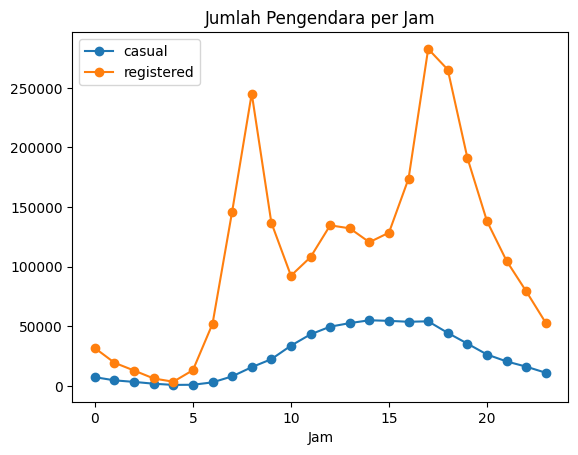

In [33]:
hr_df = hr_df.rename_axis('Jam')
hr_df.plot(title="Jumlah Pengendara per Jam", marker='o')

<Axes: title={'center': 'Jumlah Pengendara per Hari'}>

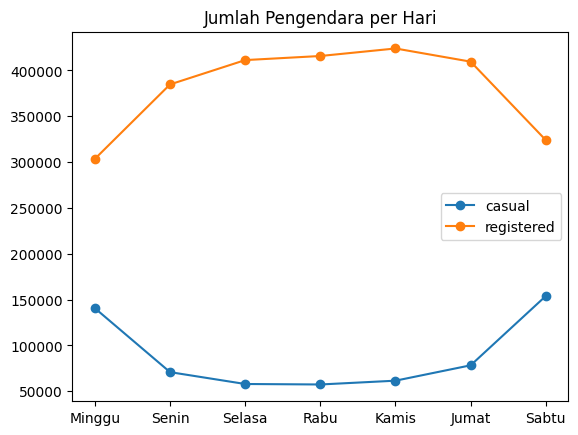

In [34]:
weekday.index = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis','Jumat','Sabtu']
weekday.plot(title="Jumlah Pengendara per Hari", marker='o')

<Axes: title={'center': 'Jumlah Pengunjung per Bulan'}>

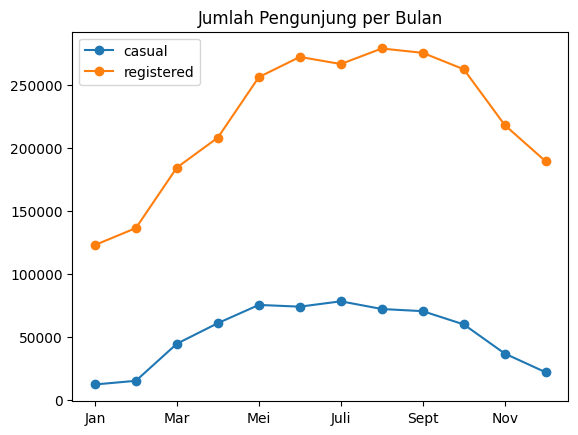

In [35]:
month_df = month_df.rename_axis('Bulan')
month_df.index = ['Jan', 'Feb', 'Mar', 'April',
            'Mei', 'Juni', 'Juli', 'Agu', 'Sept', 'Okt', 'Nov', 'Des']
month_df.plot(title="Jumlah Pengunjung per Bulan", marker='o')

###  Cuaca & musim terhadap jumlah pengendara

In [36]:
season_df = season_df.reset_index()
season = ['musim semi','musim panas', 'musim gugur', 'musim dingin']
for i in range(len(season_df)):
  season_df.season[i] = season[i]

season_df

,season,casual,registered
0,musim semi,60622,410726
1,musim panas,203522,715067
2,musim gugur,226091,835038
3,musim dingin,129782,711831


<ipython-input-37-0938f78a6ad5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='casual',data=season_df.sort_values(by='casual',ascending=False), palette=colors, ax=ax[0])
<ipython-input-37-0938f78a6ad5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='registered',data=season_df.sort_values(by='registered',ascending=False), palette=colors, ax=ax[1])


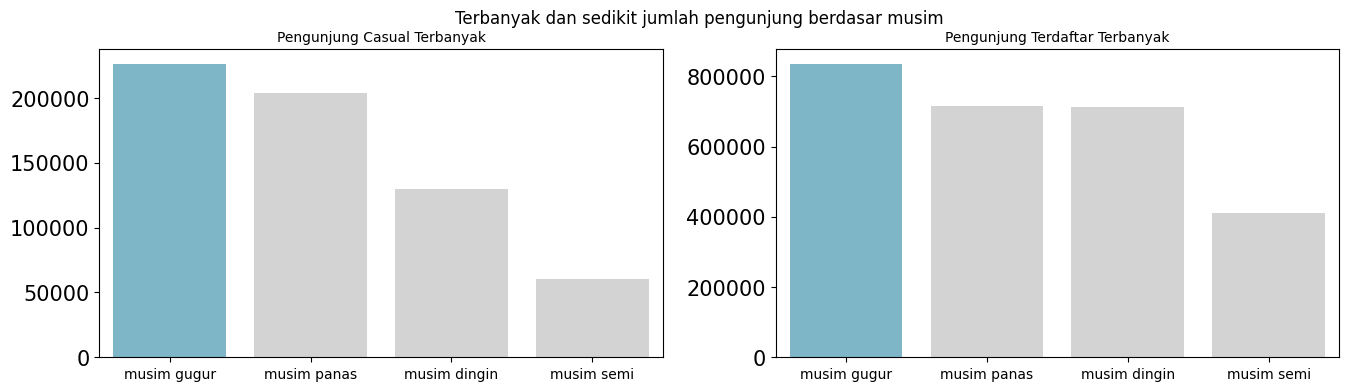

In [37]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]


sns.barplot(x='season', y='casual',data=season_df.sort_values(by='casual',ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pengunjung Casual Terbanyak", loc="center", fontsize=10)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x='season', y='registered',data=season_df.sort_values(by='registered',ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Pengunjung Terdaftar Terbanyak", loc="center", fontsize=10)
ax[1].tick_params(axis ='y', labelsize=15)

plt.suptitle("Terbanyak dan sedikit jumlah pengunjung berdasar musim", fontsize=12)
plt.show()

<Axes: title={'center': 'Jumlah Pengunjung per Cuaca'}, xlabel='Cuaca'>

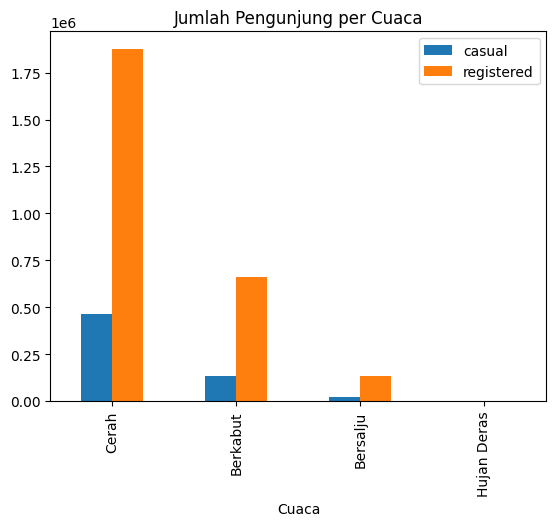

In [38]:
weather_df.index = ['Cerah', 'Berkabut', 'Bersalju', 'Hujan Deras']
weather_df = weather_df.rename_axis('Cuaca')
weather_df.plot.bar(title="Jumlah Pengunjung per Cuaca")

### Hari-hari tertentu terhadap jumlah pengendara

<Axes: title={'center': 'Hari Libur terhadap Jumlah Pengendara'}>

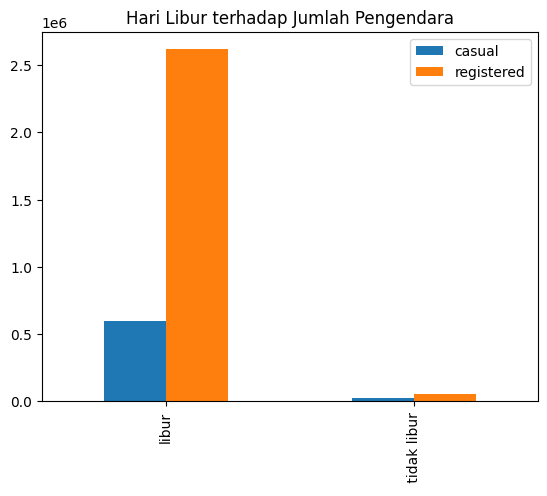

In [39]:
holiday.index = ['libur',' tidak libur']
holiday.plot.bar(title="Hari Libur terhadap Jumlah Pengendara")

<Axes: title={'center': 'Hari Kerja terhadap Jumlah Pengendara'}>

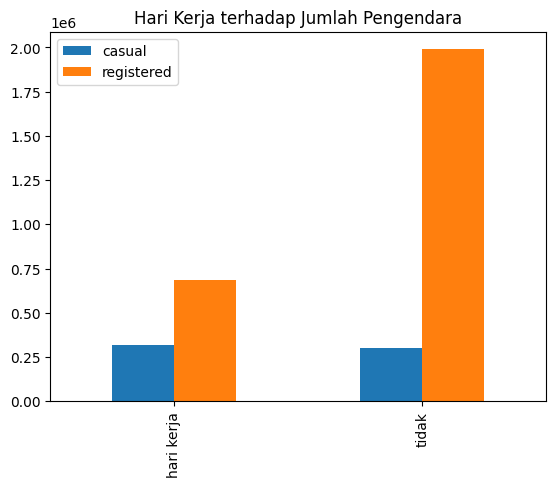

In [40]:
working.index = ['hari kerja', 'tidak']
working.plot.bar(title="Hari Kerja terhadap Jumlah Pengendara")

## Conclusion

1. Bagaimana keterkaitan waktu(jam, hari, bulan) terhadap jumlah pengendara?


* Aktivitas jumlah pengendara terbanyak berdasar jam terlihat pada pukul 08:00 dan 17:00 pada grafik pengendara 'Terdaftar'. Kemungkinan hal tersebut terjadi dikarenakan waktu tersebut merupakan waktu berangkat dan pulang para pekerja. Kemudian terlihat baik kedua plot 'Casual' dan 'Terdaftar' menunjukkan aktivitas pengendara meningkat saat di jam kerja (08:00 - 17:00) dan menurun di luar jam tersebut. Jika dibandingkan antara jumlah pengendara 'Casual' dan 'Terdaftar', pengendara 'Terdaftar' memiliki jumlah yang lebih banyak.
*  Hal menarik terlihat pada plot jumlah pengendara per hari dalam seminggu, terlihat plot aktivitas jumlah pengendara 'Casual' dan 'Terdaftar' saling berkebalikan. Plot pengendara 'Casual' cekung ke atas dengan hari Sabtu dan Minggu memiliki jumlah pengendara terbanyak. Kemudian plot pengendara 'Terdaftar' cekung ke bawah, dengan hari Sabtu dan Minggu memiliki jumlah pengendara tersedikit dibanding hari-hari lainnya. Menunjukkan pengendara 'Teregistrasi' lebih sering menggunakan sepeda dibanding dengan pengendara 'Casual', sehingga masuk akal jika lebih menguntungkan menjadi pengendara 'Teregistrasi'. Pengendara 'Casual' sendiri lebih banyak menggunakan sepeda pada hari libur (weekend : umumnya hari Sabtu dan Minggu). Tergantung tujuan penggunaan dan tempat, lonjakan pada hari Sabtu dan Minggu bisa oleh pengendara 'Casual' seperti penggunaan singkat sepeda di tempat wisata, acara olahraga atau sekedar menikmati weekends dengan bersepeda. Untuk hari kerja, penggunaan sepeda memungkinkan pekerja lebih mudah terhindar kemacetan atau alternative kendaraan mencapai tempat kerja, serta merupakan bentuk kepedulian terhadap lingkungan. Namun, tentu masih ada pekerja yang sering menggunakan sepeda tanpa menjadi pengendara 'Terdaftar'.
* Plot pengendara 'Casual' dan 'Terdaftar' memiliki pola yang hampir sama kali ini, keduanya menunjukkan aktivitas paling sedikit bersepeda pada bulan Desember - Februari, dan tertinggi pada bulan Juni-Agustus. Hal ini juga dipengaruhi oleh lokasi dan musim yang terjadi pada bulan-bulan tersebut.


2. Bagaimana keterkaitan cuaca & musim terhadap jumlah pengendara?


* Cuaca cerah merupakan hari yang menyenangkan untuk bersepeda, tentu saja jika di banding dengan cuaca berkabut, bersalju, apalagi hujan deras. Grafik menunjukkan perbedaan signifikan antara cuaca cerah dengan cuaca lainnya.
*   Musim gugur memiliki jumlah pengendara terbanyak disusul dengan musim panas, musim dingin, dan musim semi. Hal ini juga selaras dengan bedanya durasi tiap musim, terlihat musim gugur memiliki 188 hari (31 hari rata-rata tiap bulan, perhitungan terkadang bisa lebih atau kurang dari 3 bulan tergantung situasi). Dibandingkan dengan musim dingin dengan 178 hari (29 hari rata-rata tiap bulan). Tiap musim juga memiliki karakteristik masing-masing yang menyebabkan minat seseorang untuk menaiki sepeda juga berbeda, seperti musim gugur merupakan waktu yang baik untuk bersepeda dikarenakan suhunya yang cukup stabil dibanding musim semi. Disusul pemandangan musim gugur yang indah, serta waktu beraktivitas setelah liburan musim panas. Musim panas juga, identik dengan libur sekolah dan cuacanya yang hangat membuat meningkatnya aktivitas luar ruangan. Destinasi wisata yang banyak dikunjungi hingga festival musim panas yang diadakan di beragam daerah. Pada musim dingin, sepeda pun menjadi alternative terhindar dari kemacetan atau sulitnya akses jalan menunju lokasi sekolah atau kerja. Kemudian musim semi, memiliki cuaca yang cenderung tidak stabil karena merupakan musim transisi dari musim dingin ke musim panas, jika hujan turun maka sesuai dengan grafik cuaca 'Hujan' memiliki tingkat pengendara paling sedikit.


3. Bagaimana jumlah pengendara pada hari-hari tertentu (hari libur dan hari kerja)?

* Hari libur didefinisikan sebagai hari weekend beserta hari libur nasional, hari libur memiliki jumlah pengendara jauh lebih banyak dibanding tidak libur. Hal ini bisa diakibatkan pengguna mengisi kegiatan libur dengan berolahraga sepeda (dibanding hari kerja mengingat jika jarak tempat kerja cukup jauh tidak efektif menggunakan sepeda), ataupun berwisata. Jumlah pengendara 'Terdaftar' memiliki porsi lebih banyak dibanding pengendara 'Casual'.
* Memiliki pola yang sama dengan grafik hari libur, terlihat kebalikannya yakni hari kerja memiliki tingkat pengendara lebih sedikit dibanding dengan bukan hari kerja. Terlihat juga masih terdapat pengendara 'Casual' dengan bagian lebih sedikit dibanding pengendara 'Terdaftar'.

4. Bagaimana strategi pemanfaatan media untuk mempengaruhi pengendara casual agar menjadi pengendara terdaftar?

* Media menjadi salah satu langkah yang dapat digunakan untuk meningkatkan jumlah pengendara 'Terdaftar'. Beberapa hal yang dapat dilakukan melalui media baik sosial media maupun media lainnya (seperti koran, iklan, poster, baliho, dll) yaitu :
 - Melihat jumlah pengendara (khususnya pengendara 'Casual') terbanyak terjadi pada waktu kerja (08:00 - 17:00), hari libur, dan musim tertentu. Sehingga dapat dilakukan promo ataupun diskon musiman pada waktu tersebut untuk pengendara 'Terdaftar' misalnya selama libur musim panas. Lalu informasi tersebut bisa diletakkan ditempat ramai pengendara sepeda seperti stasiun sepeda ataupun lokasi wisata.
 - Selain promo musiman, promo di hari libur khusus Sabtu dan Minggu juga merupakan langkah yang baik. Promo ini bisa juga disebarluaskan melalui media sosial akun stasiun sepeda ataupun pada event khusus bersepeda, sekaligus mengangkat tema hidup sehat dan menjaga lingkungan sebagai branding penyepeda agar lebih menarik simpati masyarakat.
 - Promosi terhadap kalangan pengguna tertentu, seperti pelajar dan pekerja. Contohnya untuk pengguna 'Terdaftar' khusus pelajar bisa memperoleh potongan sekian % untuk berlangganan selama sekian waktu. Hal ini lebih efisien dipilih dibanding dengan pengendara 'Casual' yang harus membayar dengan harga normal dan lebih mahal jika sering menggunakan jasa sepedanya.

